In [1]:
# Impor library yang diperlukan
import tensorflow as tf                  # Mengimpor TensorFlow, library utama untuk deep learning dan pengelolaan tensor
from tensorflow import keras             # Mengimpor Keras, API tingkat tinggi untuk membangun dan melatih model
from tensorflow.keras import layers      # Mengimpor modul layers untuk mendefinisikan lapisan seperti Conv2D, Dense, dll.
import numpy as np                       # Mengimpor NumPy untuk operasi numerik dan manipulasi array
import matplotlib.pyplot as plt          # Mengimpor Matplotlib untuk visualisasi data seperti grafik dan gambar
import os                                # Mengimpor os untuk operasi sistem seperti mengakses direktori dan file
import cv2                               # Mengimpor OpenCV untuk memuat dan memproses gambar
from google.colab import files           # Mengimpor modul files untuk mengunggah file di Google Colab
from sklearn.model_selection import train_test_split  # Mengimpor fungsi untuk membagi dataset menjadi training dan validation


In [2]:
# Mengunggah Kaggle API key
print("Unggah file kaggle.json Anda (dapatkan dari Kaggle > Account > Create New API Token)")  # Menampilkan instruksi untuk mengunggah file kaggle.json
uploaded = files.upload()                # Meminta pengguna mengunggah file kaggle.json dan menyimpan hasilnya di variabel uploaded
!mkdir -p ~/.kaggle                      # Membuat direktori .kaggle di root Colab (jika belum ada) menggunakan perintah shell
!mv kaggle.json ~/.kaggle/               # Memindahkan file kaggle.json yang diunggah ke direktori ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json         # Mengatur izin file kaggle.json agar hanya pemilik yang bisa membaca/menulis

Unggah file kaggle.json Anda (dapatkan dari Kaggle > Account > Create New API Token)


Saving kaggle.json to kaggle.json


In [3]:
# Mengunduh dan mengekstrak dataset
!kaggle datasets download -d gibranfadilla/indonesian-wayang-types  # Mengunduh dataset "Indonesian Wayang Types" dari Kaggle
!unzip -q indonesian-wayang-types.zip -d dataset                    # Mengekstrak file zip dataset ke folder 'dataset' secara diam-diam (-q)


Dataset URL: https://www.kaggle.com/datasets/gibranfadilla/indonesian-wayang-types
License(s): CC0-1.0
 95% 43.0M/45.4M [00:02<00:00, 24.0MB/s]
100% 45.4M/45.4M [00:03<00:00, 15.7MB/s]


In [4]:
# Direktori training dan testing
train_dir = '/content/dataset/Wayangs/train'     # Menentukan path direktori untuk data training
test_dir = '/content/dataset/Wayangs/val'       # Menentukan path direktori untuk data testing

In [6]:
# Fungsi untuk memuat gambar dan label dari direktori
def load_images_and_labels(base_dir, image_size=(224, 224)):  # Mendefinisikan fungsi dengan parameter direktori dan ukuran gambar default 224x224
    images = []                          # Membuat list kosong untuk menyimpan gambar
    labels = []                          # Membuat list kosong untuk menyimpan label
    class_names = sorted(os.listdir(base_dir))  # Mendapatkan daftar nama kelas dari subfolder di base_dir, diurutkan alfabetis
    class_dict = {name: idx for idx, name in enumerate(class_names)}  # Membuat dictionary yang memetakan nama kelas ke indeks numerik

    for class_name in class_names:       # Loop melalui setiap nama kelas
        class_dir = os.path.join(base_dir, class_name)  # Menggabungkan base_dir dengan nama kelas untuk mendapatkan path subfolder
        if not os.path.isdir(class_dir): # Memeriksa apakah class_dir adalah direktori; jika bukan, lanjut ke iterasi berikutnya
            continue
        for filename in os.listdir(class_dir):  # Loop melalui setiap file dalam subfolder kelas
            filepath = os.path.join(class_dir, filename)  # Menggabungkan class_dir dengan nama file untuk mendapatkan path lengkap
            if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # Memeriksa apakah file adalah gambar berdasarkan ekstensi
                img = cv2.imread(filepath)   # Memuat gambar dari filepath menggunakan OpenCV
                if img is not None:          # Memastikan gambar berhasil dimuat (tidak None)
                    img = cv2.resize(img, image_size)  # Mengubah ukuran gambar ke 224x224
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Mengonversi format warna dari BGR (default OpenCV) ke RGB
                    images.append(img)       # Menambahkan gambar ke list images
                    labels.append(class_dict[class_name])  # Menambahkan indeks kelas ke list labels

    return np.array(images), np.array(labels), class_names  # Mengembalikan gambar, label, dan nama kelas sebagai array NumPy

In [7]:
# Memuat data training
train_images, train_labels, class_names = load_images_and_labels(train_dir)  # Memanggil fungsi untuk memuat data dari direktori training
num_classes = len(class_names)           # Menghitung jumlah kelas berdasarkan panjang class_names
print(f"Nama kelas: {class_names}")      # Menampilkan daftar nama kelas (misalnya, Wayang Kulit, Wayang Golek)
print(f"Jumlah kelas: {num_classes}")    # Menampilkan jumlah total kelas
print(f"Jumlah gambar training: {len(train_images)}")  # Menampilkan jumlah total gambar training

Nama kelas: ['Wayang Beber', 'Wayang Gedog', 'Wayang Golek', 'Wayang Krucil', 'Wayang Kulit', 'Wayang Suluh']
Jumlah kelas: 6
Jumlah gambar training: 179


In [8]:
# Memuat data testing
test_images, test_labels, _ = load_images_and_labels(test_dir)  # Memanggil fungsi untuk memuat data dari direktori testing (class_names diabaikan)
print(f"Jumlah gambar testing: {len(test_images)}")  # Menampilkan jumlah total gambar testing


Jumlah gambar testing: 54


In [9]:
# Normalisasi gambar
train_images = train_images / 255.0      # Membagi nilai piksel train_images dengan 255 untuk normalisasi ke rentang 0-1
test_images = test_images / 255.0        # Membagi nilai piksel test_images dengan 255 untuk normalisasi ke rentang 0-1


In [10]:
# Membagi data training menjadi training dan validation
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)  # Membagi data: 80% training, 20% validation
print(f"Jumlah data training: {len(x_train)}")  # Menampilkan jumlah gambar untuk training setelah pembagian
print(f"Jumlah data validation: {len(x_val)}")  # Menampilkan jumlah gambar untuk validation setelah pembagian

Jumlah data training: 143
Jumlah data validation: 36


In [11]:
# Mengubah label menjadi one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)  # Mengonversi label training ke format one-hot encoding
y_val = tf.keras.utils.to_categorical(y_val, num_classes)      # Mengonversi label validation ke format one-hot encoding
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)  # Mengonversi label testing ke format one-hot encoding


In [12]:
# Membuat dataset TensorFlow
batch_size = 32                          # Menentukan ukuran batch untuk pelatihan (32 gambar per batch)
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000).batch(batch_size)  # Membuat dataset training, diacak, dan dibagi ke batch
val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(batch_size)  # Membuat dataset validation dan dibagi ke batch
test_ds = tf.data.Dataset.from_tensor_slices((test_images, y_test)).batch(batch_size)  # Membuat dataset testing dan dibagi ke batch


In [13]:
# Optimasi performa dataset
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)  # Meng-cache dan prefetch dataset training untuk efisiensi
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)      # Meng-cache dan prefetch dataset validation untuk efisiensi
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)    # Meng-cache dan prefetch dataset testing untuk efisiensi


In [14]:
# Membangun model CNN
model = keras.Sequential([               # Membuat model sequential (lapisan ditambahkan berurutan)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Lapisan konvolusi pertama: 32 filter, ukuran 3x3, input 224x224x3
    layers.MaxPooling2D((2, 2)),         # Lapisan pooling pertama: mengurangi dimensi spasial dengan faktor 2
    layers.Conv2D(64, (3, 3), activation='relu'),  # Lapisan konvolusi kedua: 64 filter, ukuran 3x3
    layers.MaxPooling2D((2, 2)),         # Lapisan pooling kedua: mengurangi dimensi spasial lagi
    layers.Conv2D(128, (3, 3), activation='relu'),  # Lapisan konvolusi ketiga: 128 filter, ukuran 3x3
    layers.MaxPooling2D((2, 2)),         # Lapisan pooling ketiga: mengurangi dimensi spasial lebih lanjut
    layers.Flatten(),                    # Meratakan output menjadi vektor untuk lapisan dense
    layers.Dense(128, activation='relu'),  # Lapisan fully connected dengan 128 neuron
    layers.Dropout(0.5),                 # Dropout 50% untuk mencegah overfitting
    layers.Dense(num_classes, activation='softmax')  # Lapisan output dengan jumlah neuron sesuai kelas, menggunakan softmax
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Kompilasi model
model.compile(optimizer='adam',          # Mengompilasi model dengan optimizer Adam
              loss='categorical_crossentropy',  # Menggunakan loss categorical_crossentropy untuk klasifikasi multi-kelas
              metrics=['accuracy'])      # Mengukur akurasi sebagai metrik selama pelatihan


In [16]:
# Melatih model
history = model.fit(train_ds,            # Melatih model menggunakan dataset training
                    validation_data=val_ds,  # Menggunakan dataset validation untuk memantau performa
                    epochs=10)           # Melatih selama 10 epoch (iterasi penuh dataset)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.1083 - loss: 3.1153 - val_accuracy: 0.3056 - val_loss: 1.7788
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2182 - loss: 1.7849 - val_accuracy: 0.3056 - val_loss: 1.7411
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2999 - loss: 1.7317 - val_accuracy: 0.5000 - val_loss: 1.6040
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4567 - loss: 1.5825 - val_accuracy: 0.4444 - val_loss: 1.3577
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4404 - loss: 1.4293 - val_accuracy: 0.5000 - val_loss: 1.2770
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5020 - loss: 1.3386 - val_accuracy: 0.4444 - val_loss: 1.3483
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6639 - loss: 0.9307 - val_accuracy: 0.4722 - val_loss: 1.2866
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7348 - loss: 0.6816 - val_accuracy: 0.6111 - val_loss: 1.1573
E

In [17]:

# Evaluasi model pada data testing
test_loss, test_acc = model.evaluate(test_ds)  # Mengevaluasi model pada dataset testing, mengembalikan loss dan akurasi
print(f'Akurasi testing: {test_acc:.4f}')  # Menampilkan akurasi testing dengan 4 digit desimal


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step - accuracy: 0.6983 - loss: 0.8073
Akurasi testing: 0.7037


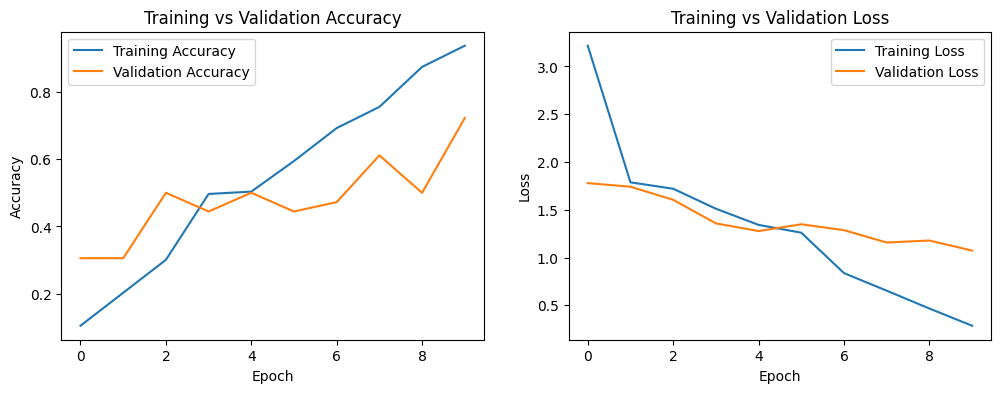

In [18]:
# Visualisasi akurasi dan loss
plt.figure(figsize=(12, 4))              # Membuat figure dengan ukuran 12x4 inci untuk dua plot berdampingan
plt.subplot(1, 2, 1)                     # Membuat subplot pertama (1 baris, 2 kolom, posisi 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot akurasi training per epoch
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot akurasi validation per epoch
plt.title('Training vs Validation Accuracy')  # Menambahkan judul plot akurasi
plt.xlabel('Epoch')                      # Label sumbu x: epoch
plt.ylabel('Accuracy')                   # Label sumbu y: akurasi
plt.legend()                             # Menampilkan legenda untuk membedakan garis
plt.subplot(1, 2, 2)                     # Membuat subplot kedua (1 baris, 2 kolom, posisi 2)
plt.plot(history.history['loss'], label='Training Loss')  # Plot loss training per epoch
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot loss validation per epoch
plt.title('Training vs Validation Loss')  # Menambahkan judul plot loss
plt.xlabel('Epoch')                      # Label sumbu x: epoch
plt.ylabel('Loss')                       # Label sumbu y: loss
plt.legend()                             # Menampilkan legenda untuk membedakan garis
plt.show()                               # Menampilkan kedua plot

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


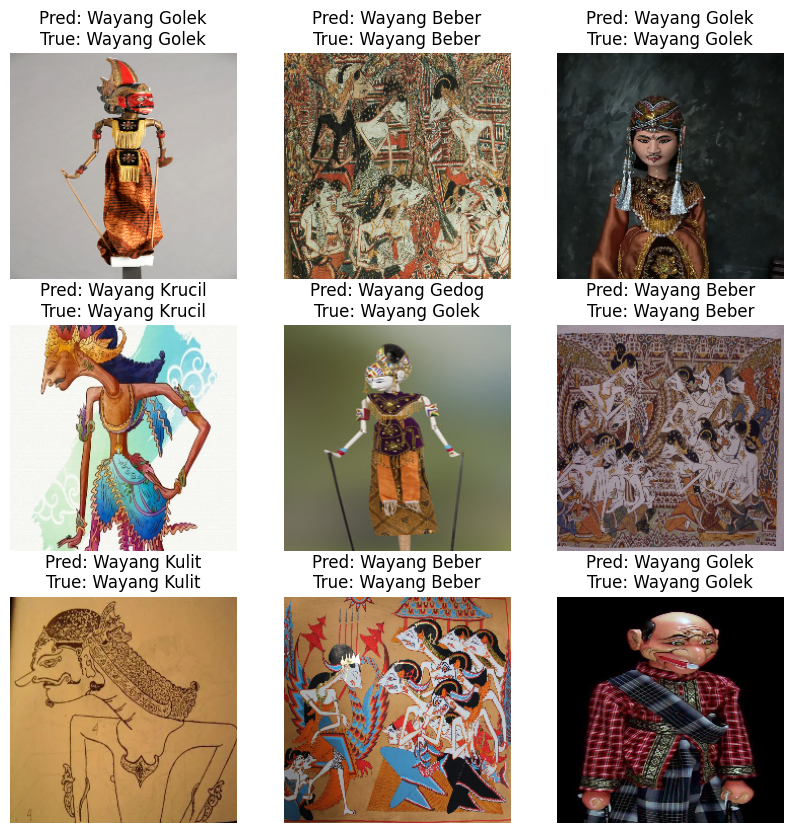

In [19]:
for images, labels in val_ds.take(1):    # Mengambil satu batch dari dataset validation untuk visualisasi prediksi
    predictions = model.predict(images)  # Membuat prediksi untuk batch gambar tersebut
    plt.figure(figsize=(10, 10))         # Membuat figure baru dengan ukuran 10x10 inci
    for i in range(9):                   # Loop untuk 9 gambar pertama dalam batch
        plt.subplot(3, 3, i+1)           # Membuat subplot dalam grid 3x3, posisi ke-i+1
        plt.imshow(images[i].numpy())    # Menampilkan gambar ke-i dalam format RGB
        pred_label = class_names[np.argmax(predictions[i])]  # Mengambil label prediksi dari probabilitas tertinggi
        true_label = class_names[np.argmax(labels[i])]  # Mengambil label asli dari one-hot encoding
        plt.title(f'Pred: {pred_label}\nTrue: {true_label}')  # Menampilkan judul dengan prediksi dan label asli
        plt.axis('off')                  # Menghilangkan sumbu untuk tampilan bersih
    plt.show()                           # Menampilkan semua subplot
    break                                # Keluar dari loop setelah satu batch